In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = Image.open('/content/train.jpg').convert('L')

np_img = np.array(img)
print(np_img)
#np_img= ~np_img  # invert B&W
#print(np_img)
teta=75
np_img[np_img<= teta] = 0
np_img[np_img > teta] = 1

[[254 255 255 ... 255 255 250]
 [254 255 255 ... 253 255 255]
 [253 254 253 ... 247 250 254]
 ...
 [255 252 249 ... 254 253 253]
 [255 254 253 ... 254 255 255]
 [252 255 255 ... 255 255 255]]


In [4]:
print(np_imgn,np_img.shape)
plt.imshow(np_imgn , cmap='binary')

NameError: ignored

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1, -1],
       [ 1,  1,  1, ..., -1, -1,  1],
       ...,
       [ 1,  1,  1, ..., -1,  1,  1],
       [ 1,  1,  1, ..., -1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1]], dtype=int32)

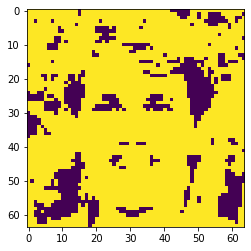

In [5]:
import cv2
#img is your image as array

#size of the new image
height = 64
width = 64

img_resized = cv2.resize(np_img, (width, height))
plt.imshow(img_resized)
S =img_resized.astype('int32') 
S[S==0]=-1
S

64


array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

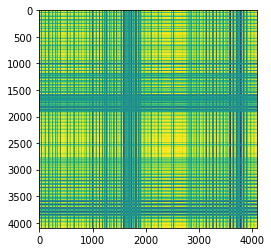

In [7]:
print(S.shape[0])
w =S.reshape(-1, 1) @ S.reshape(1, -1) - np.eye(S.size)
plt.imshow(w)
w


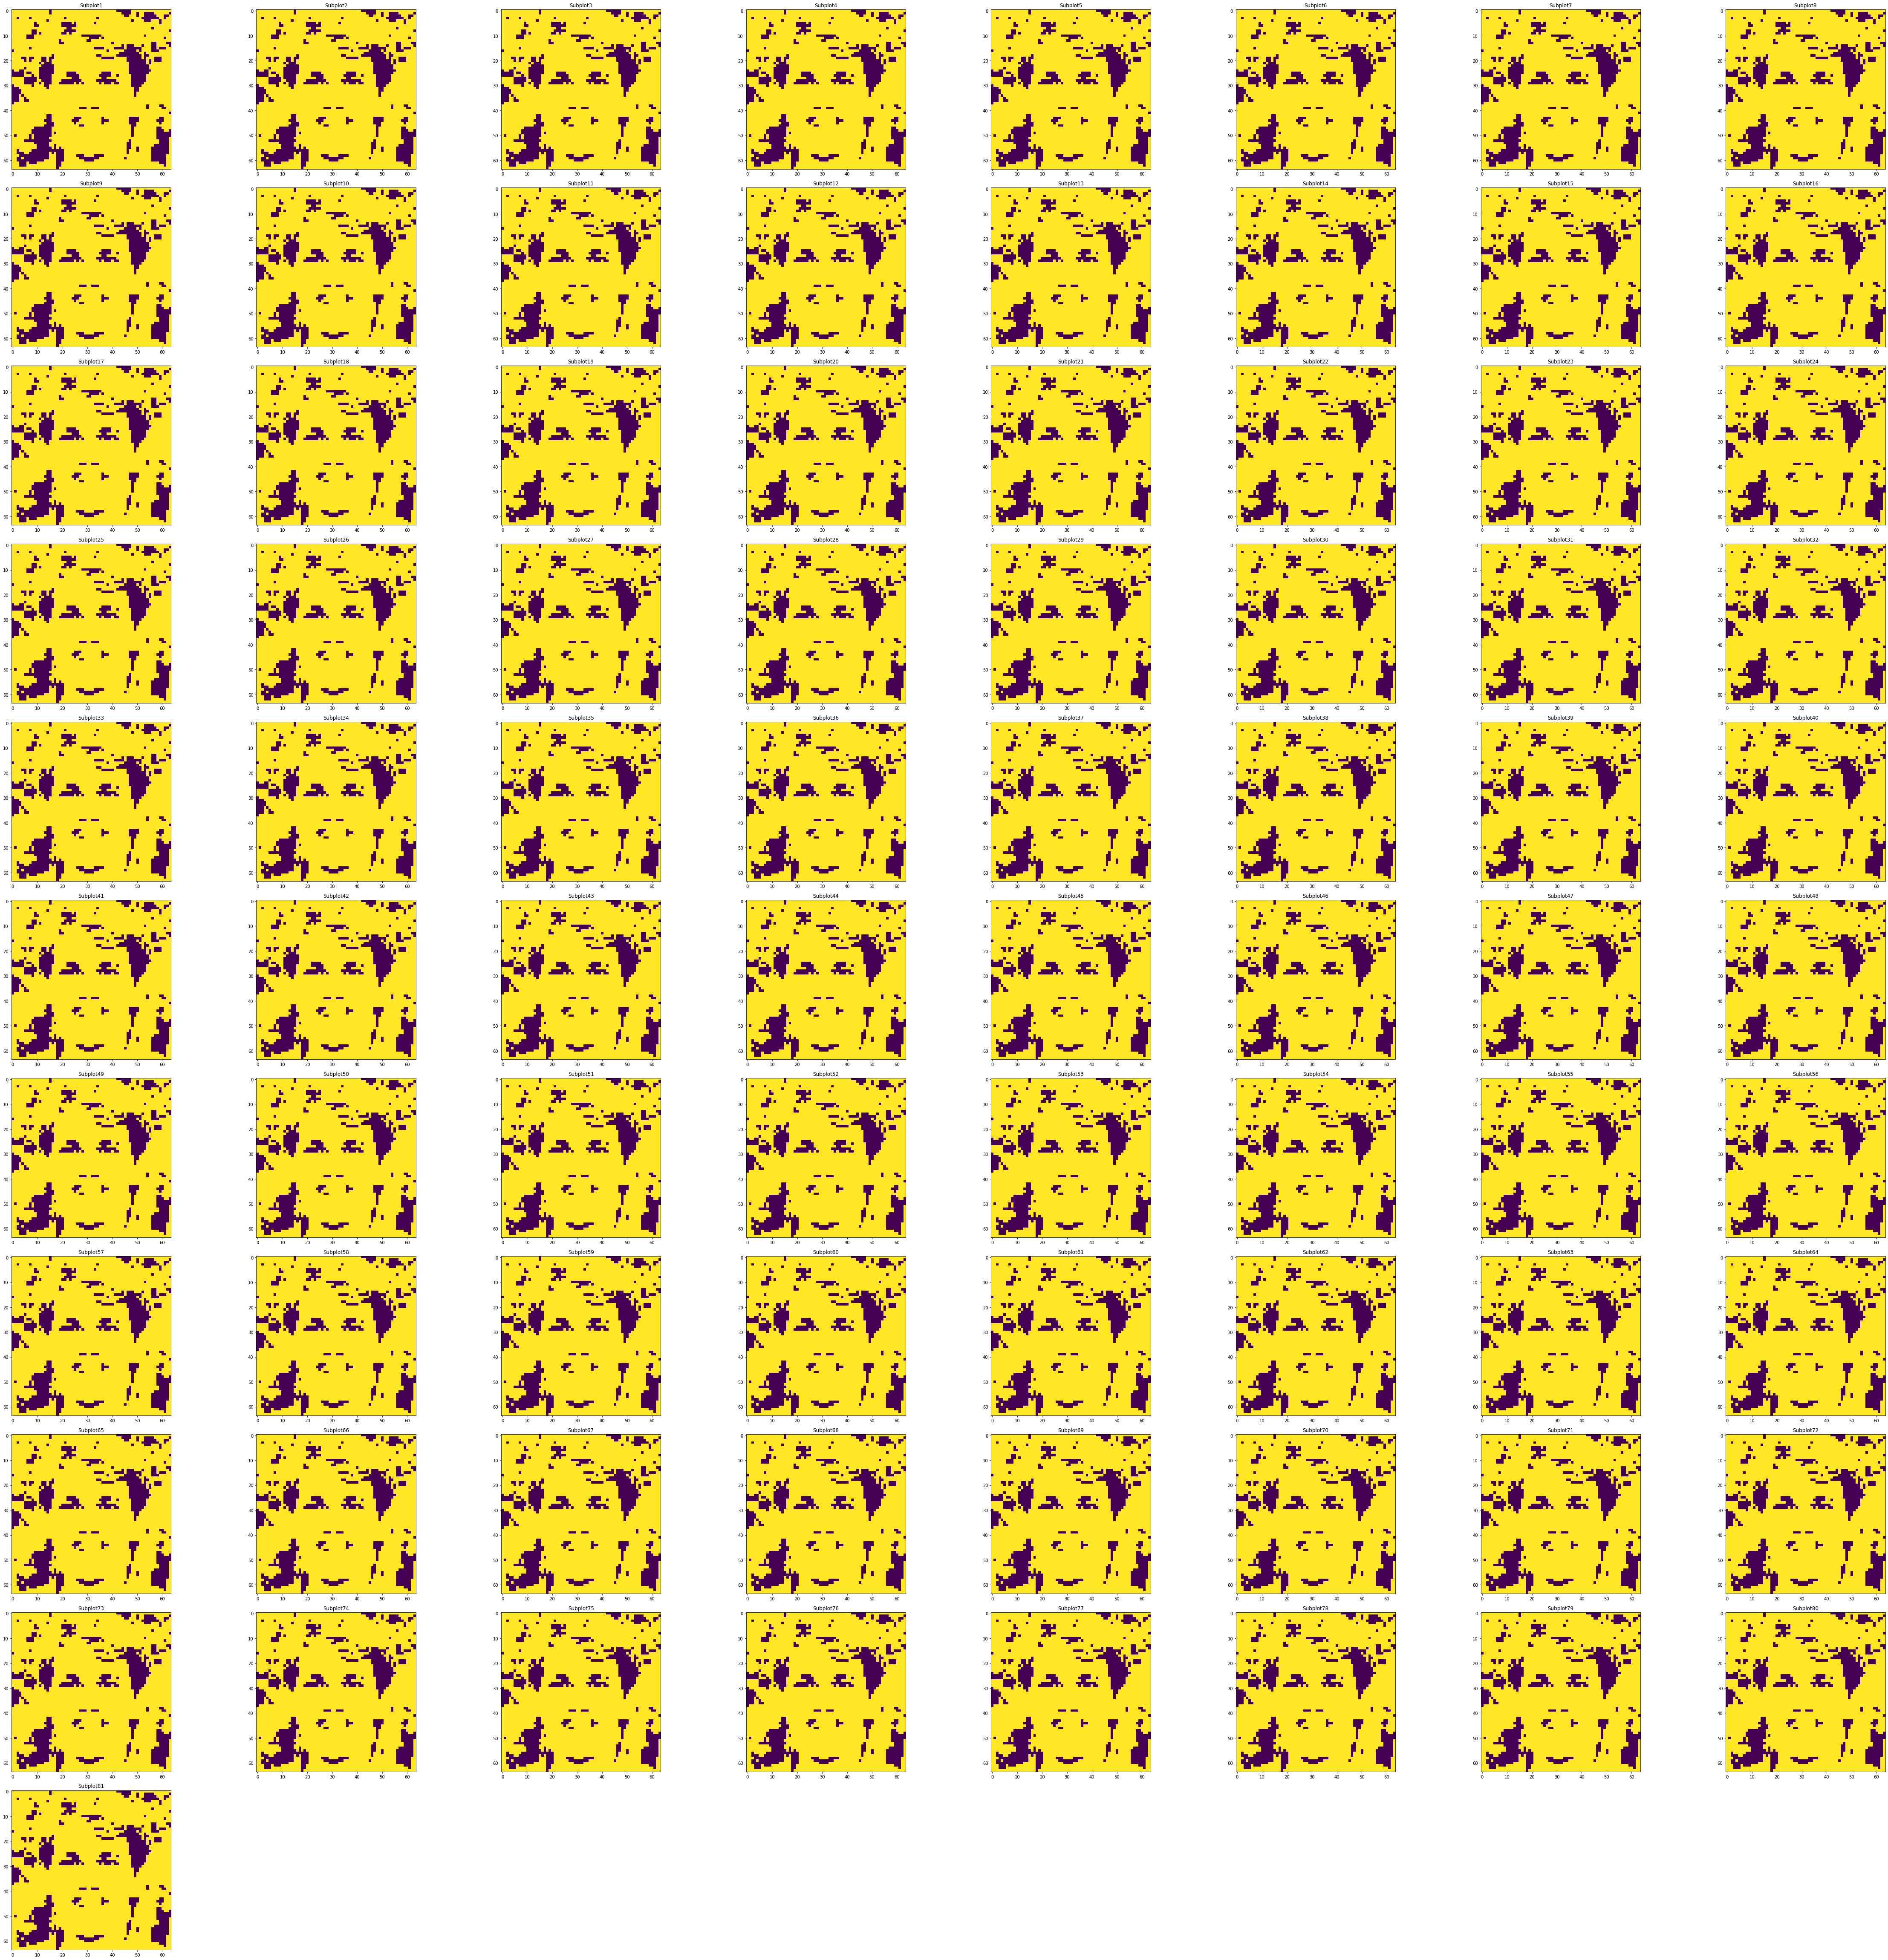

In [8]:
x = S.reshape(1, -1)
n=0
nn=0
y = np.copy(x)
out = None
def comparator( input, threshold):
  if input > threshold:
    return 1
  elif input < threshold:
    return -1
  else:
    return input
randiter = np.random.choice(np.arange(64*64), 64*64, replace=False)
axes=[]
fig=plt.figure(figsize=(64, 64))
for i in randiter:
  y_in = x[0][i] + np.sum(y[0] * w[:, i])
  y[0][i] = comparator(y_in, 0)
  out = np.copy(y)
  n=n+1
  if n%50 == 0 :
    nn =nn+1
    axes.append( fig.add_subplot(11, 8, nn) )
    subplot_title=("Subplot"+str(nn))
    axes[-1].set_title(subplot_title)  
    plt.imshow(out.reshape(64,64))
    #print(out.reshape(64,64))
fig.tight_layout()    
plt.show()

In [9]:
def testing_(predA, A):
    return np.sum((predA == A).astype('int')) / A.size

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1, -1],
       [ 1,  1,  1, ..., -1, -1,  1],
       ...,
       [ 1,  1,  1, ..., -1,  1,  1],
       [ 1,  1,  1, ..., -1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1]], dtype=int32)

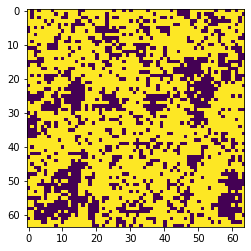

In [22]:
img2 = Image.open('/content/test3.png').convert('L')

np_img2 = np.array(img2)
print(np_img)
#np_img= ~np_img  # invert B&W
#print(np_img)
teta=75
np_img2[np_img2<= teta] = 0
np_img2[np_img2 > teta] = 1
img_resized2 = cv2.resize(np_img2, (width, height))
plt.imshow(img_resized2)
S2 =img_resized2.astype('int32') 
S2[S2==0]=-1
S

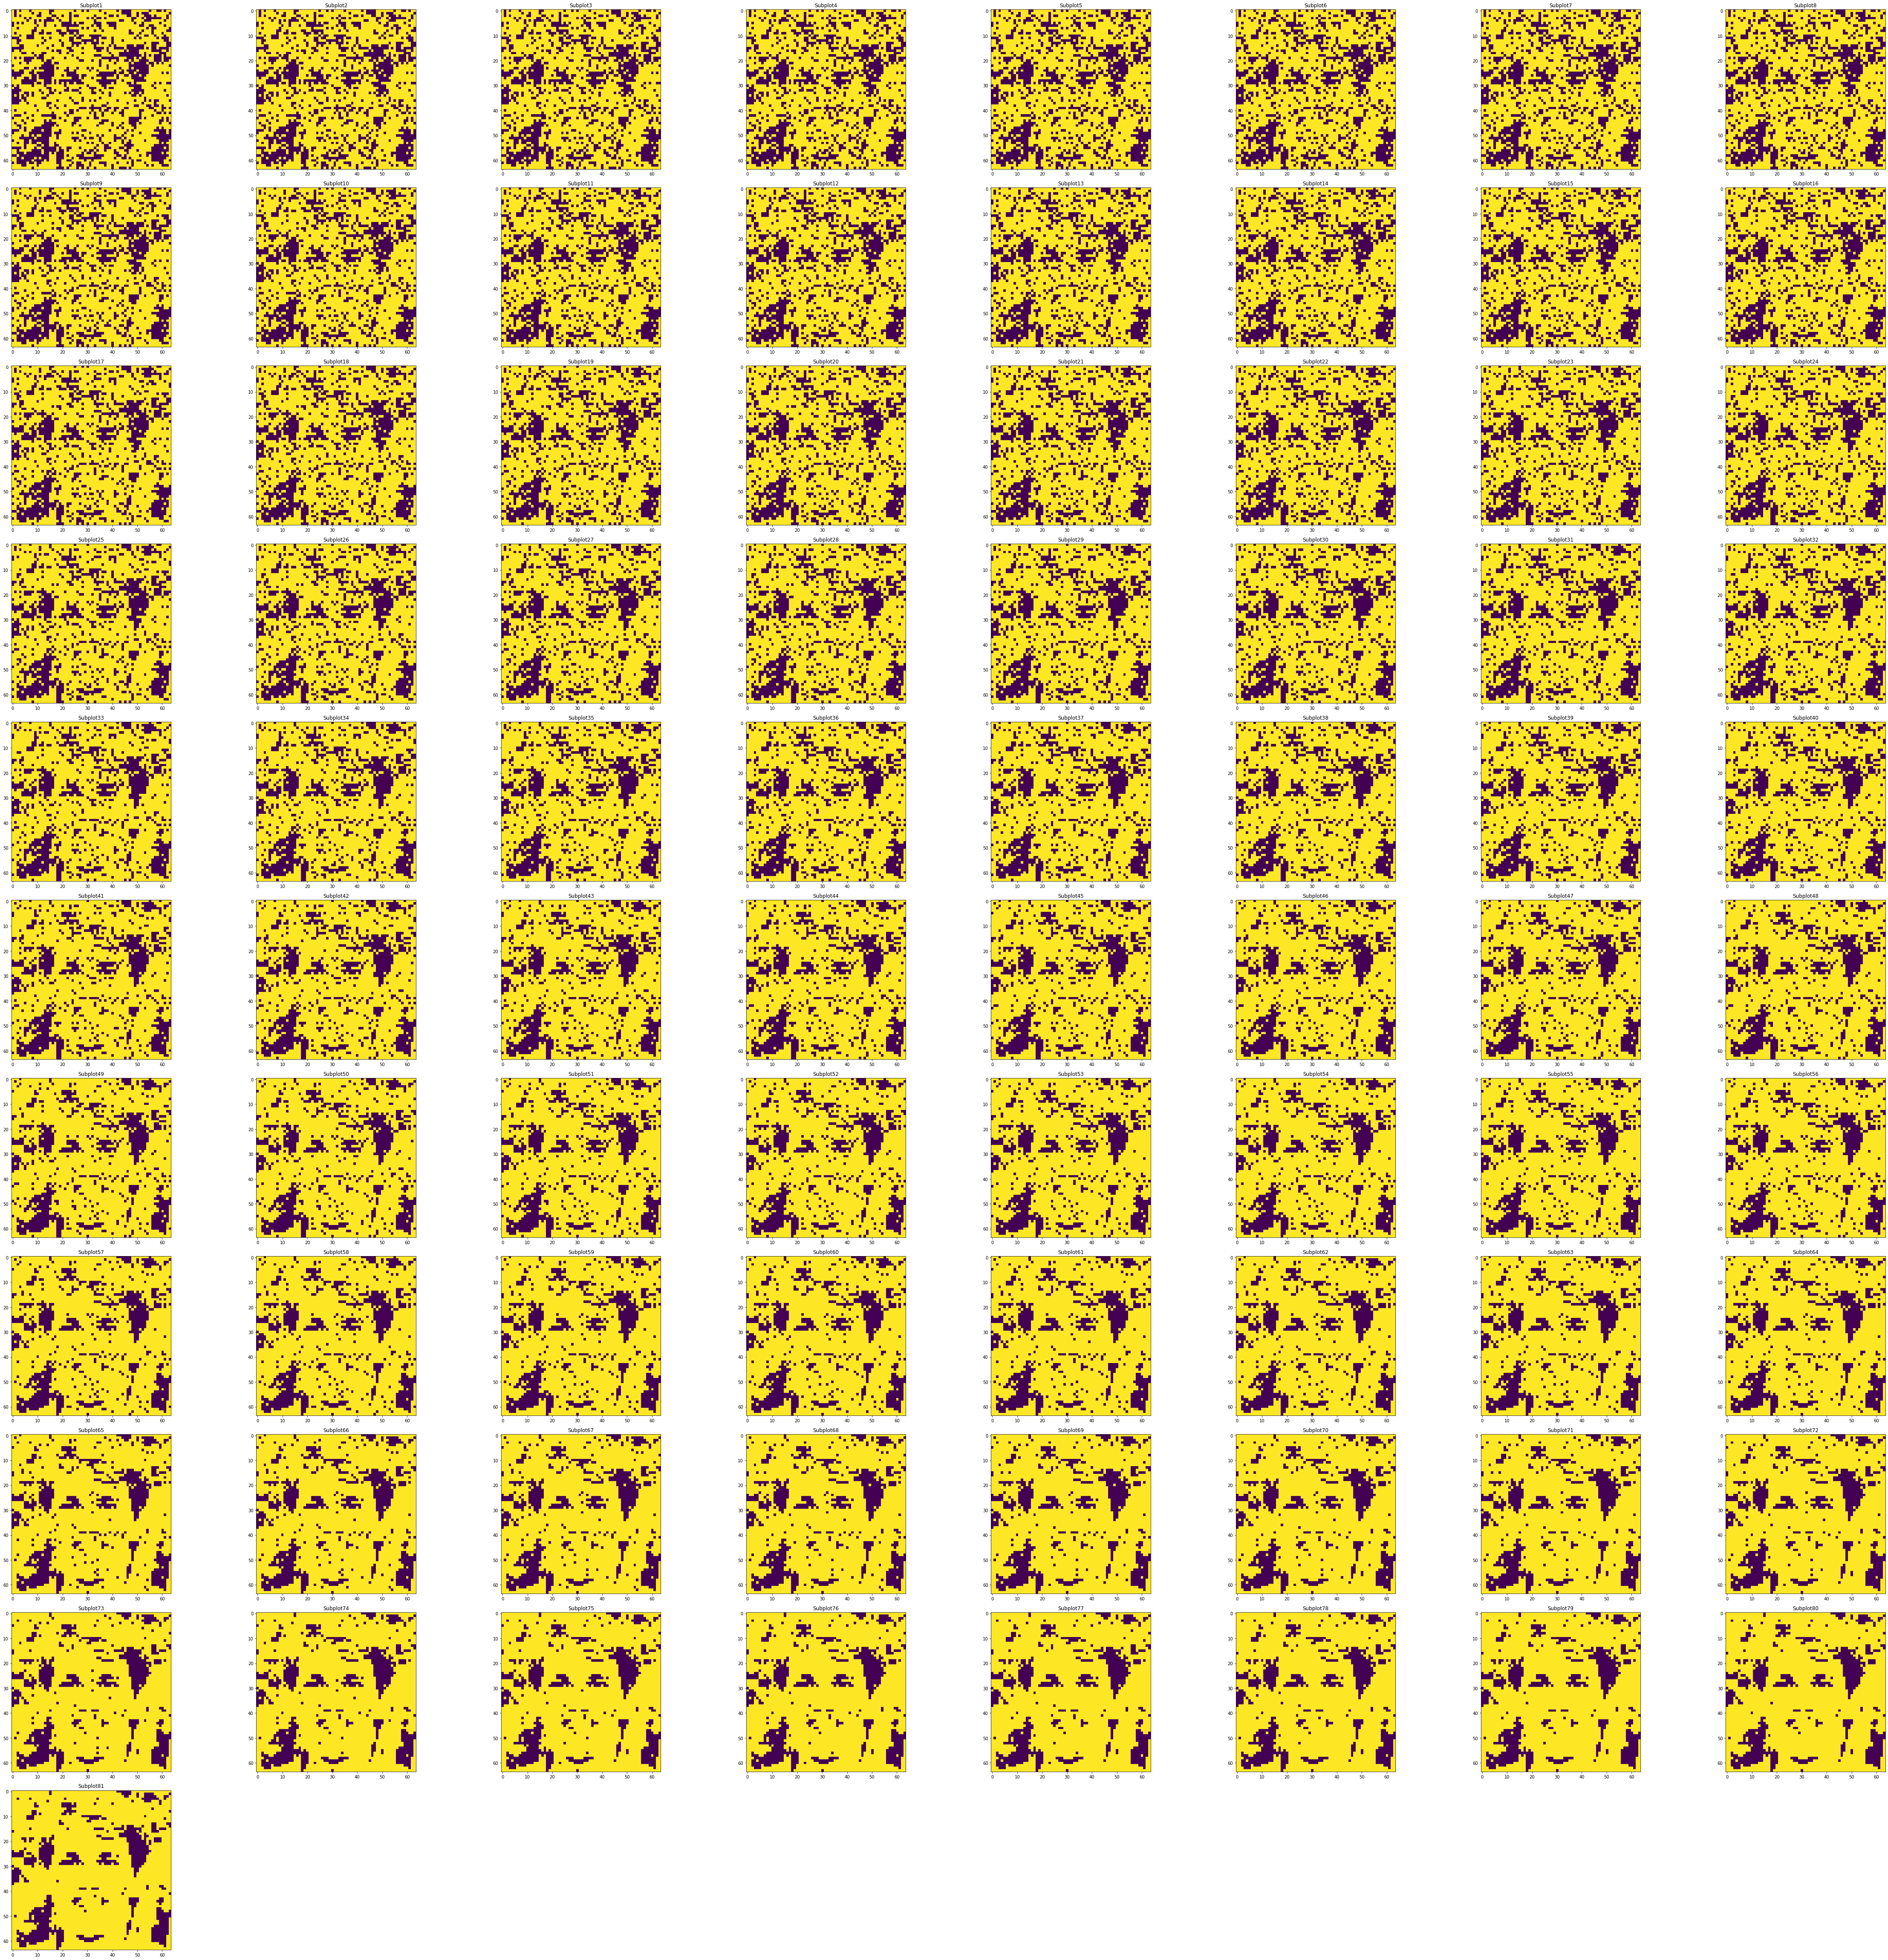

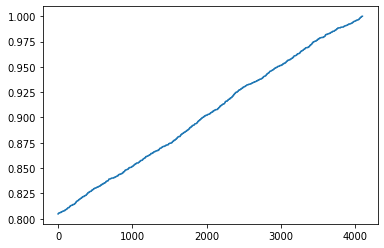

In [23]:

x = S2.reshape(1, -1)
n=0
nn=0
y = np.copy(x)
out = None
def comparator( input, threshold):
  if input > threshold:
    return 1
  elif input < threshold:
    return -1
  else:
    return input
randiter = np.random.choice(np.arange(64*64), 64*64, replace=False)
axes=[]
ham =[]
fig=plt.figure(figsize=(64, 64))
for i in randiter:
  y_in = x[0][i] + np.sum(y[0] * w[:, i])
  y[0][i] = comparator(y_in, 0)
  out = np.copy(y)
  n=n+1
  ham.append(testing_(out , S.reshape(1,-1)))
  if n%50 == 0 :
    nn =nn+1
    axes.append( fig.add_subplot(11, 8, nn) )
    subplot_title=("Subplot"+str(nn))
    axes[-1].set_title(subplot_title)  
    plt.imshow(out.reshape(64,64))
    #print(out.reshape(64,64))
fig.tight_layout()    
plt.show()
plt.plot(ham)